In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\OmAruna-PC\\Downloads')
import warnings
warnings.simplefilter('ignore')

# PART 1- PCA

Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [2]:
data= pd.read_csv('Hair Salon.csv')

In [3]:
data.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [5]:
data= data.set_index('ID')

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7


Above dataset is about ratings by customers for various quality of services by a Hair Salon. Every feature ranges from 1-10 in the dataset. Further we check the description and outliers, duplicated and null values in the dataset.

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

### Univariate Analysis

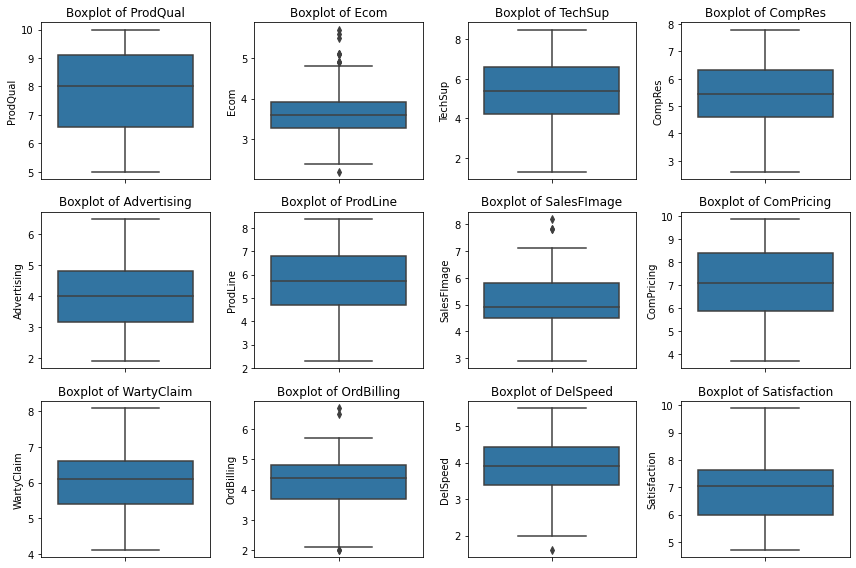

In [9]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data =data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Ecom, ,SalesFImage and OrdBilling has outliers.

### BI-Variate Analysis

In [10]:
corr= data.corr()
corr

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


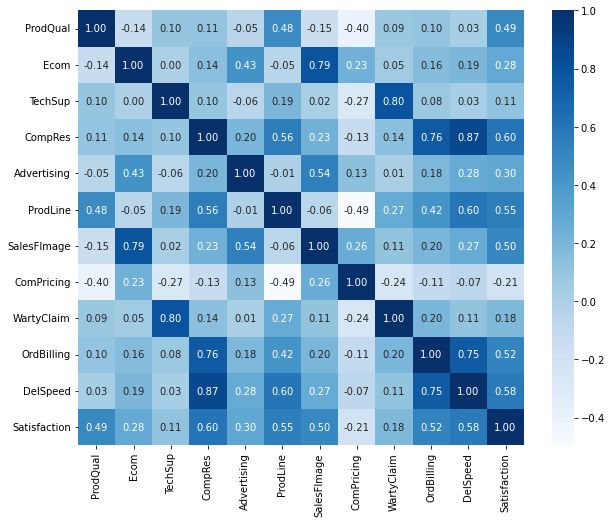

In [11]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True,fmt='.2f', cmap="Blues")
plt.show()

### Observation
There are considerable number of features that are highly correlated.
1. SalesFImage and Ecom have a significant correlation
2.WartyClaim and TechSup have high correlation
3.OrderBilling and CompRes have a significant resolution
4. DelSpeed and CompRes have high correlation.

Outlier Treatment

In [12]:
def remove_outlier(col):
    Q1, Q3= col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [13]:
feature_list=data.columns
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i]=np.where(data[i]>UL,UL,data[i])
    data[i]=np.where(data[i]<LL,LL, data[i])

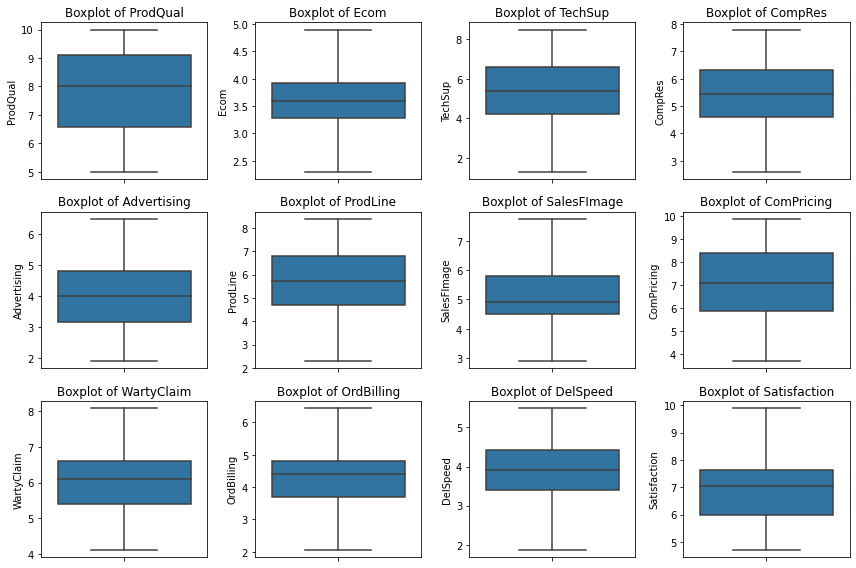

In [14]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data =data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810000,1.396279,5.0000,6.575,8.00,9.100,10.00
Ecom,100.0,3.646000,0.635550,2.3000,3.275,3.60,3.925,4.90
TechSup,100.0,5.365000,1.530457,1.3000,4.250,5.40,6.625,8.50
CompRes,100.0,5.442000,1.208403,2.6000,4.600,5.45,6.325,7.80
Advertising,100.0,4.010000,1.126943,1.9000,3.175,4.00,4.800,6.50
ProdLine,100.0,5.805000,1.315285,2.3000,4.700,5.75,6.800,8.40
SalesFImage,100.0,5.117500,1.057617,2.9000,4.500,4.90,5.800,7.75
ComPricing,100.0,6.974000,1.545055,3.7000,5.875,7.10,8.400,9.90
WartyClaim,100.0,6.043000,0.819738,4.1000,5.400,6.10,6.600,8.10
OrdBilling,100.0,4.276000,0.918895,2.0500,3.700,4.40,4.800,6.45


In [16]:
from scipy.stats import zscore

In [17]:
scaled_df=data.apply(zscore)

In [18]:
scaled_df.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,,,,,,,,,,,,
1,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.260903,1.081067
2,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.398918,-1.027098
3,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.845644,1.671354
4,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.229132,-1.786038
5,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.537540,0.153474


In [19]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,8.744394e-16,1.005038,-2.022630,-0.888949,0.136761,0.928538,1.576356
Ecom,100.0,7.260859e-16,1.005038,-2.128522,-0.586688,-0.072743,0.441202,1.983036
TechSup,100.0,1.015854e-15,1.005038,-2.669451,-0.732211,0.022984,0.827431,2.058728
CompRes,100.0,-1.343370e-16,1.005038,-2.363712,-0.700298,0.006654,0.734398,1.961166
Advertising,100.0,-5.884182e-16,1.005038,-1.881755,-0.744675,-0.008918,0.704543,2.220649
ProdLine,100.0,2.353673e-16,1.005038,-2.678246,-0.844354,-0.042027,0.760301,1.982896
SalesFImage,100.0,2.747802e-16,1.005038,-2.107257,-0.586801,-0.206687,0.648570,2.501625
ComPricing,100.0,-7.016610e-16,1.005038,-2.129693,-0.714885,0.081961,0.927594,1.903324
WartyClaim,100.0,-1.274536e-15,1.005038,-2.382210,-0.788348,0.069885,0.682908,2.521979
OrdBilling,100.0,6.217249e-17,1.005038,-2.434679,-0.629998,0.135625,0.573123,2.377804


In [20]:
corr1=scaled_df.corr()
corr

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


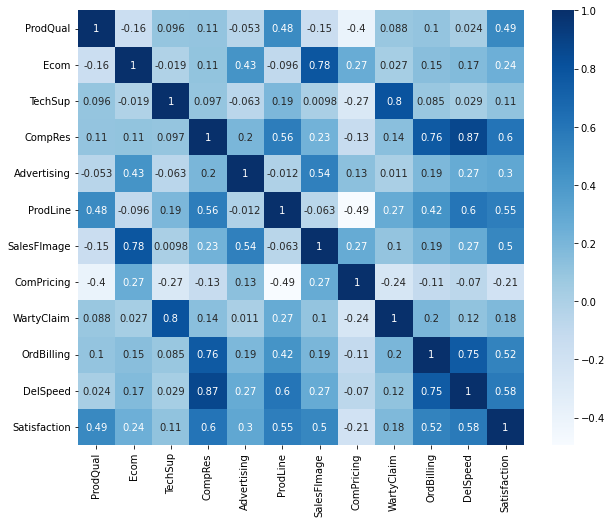

In [21]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(corr1,annot=True, cmap='Blues')
plt.show()

In [22]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
p_value

1.521522869758865e-120

In [23]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model

0.661515680318828

In [24]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=1)
df_pca = pca.fit_transform(scaled_df)
df_pca


array([[-0.48399761,  1.62835584,  1.94186034, ...,  0.09127078,
        -0.3415812 ,  0.0304912 ],
       [-0.54959388, -2.53350262,  1.99787588, ...,  0.55103989,
         0.20191667, -0.22230091],
       [-2.76018116, -0.70810756,  0.17986807, ..., -0.68770744,
         0.20605751, -0.20041436],
       ...,
       [ 3.41885848, -1.85138815,  1.41753961, ..., -0.26612179,
        -0.37397449,  0.37914888],
       [-0.45164164,  2.45083759, -1.19082996, ...,  0.07258747,
         0.07339651, -0.70490115],
       [ 1.63722265,  1.23072302,  0.43212336, ...,  0.39810739,
        -0.05413757,  0.04772407]])

In [25]:
#Extract eigen vectors
pca.components_

array([[-1.61322427e-01, -1.38992261e-01, -1.27131534e-01,
        -4.25502348e-01, -1.77257763e-01, -3.56524003e-01,
        -2.10387616e-01,  1.37603805e-01, -1.76706227e-01,
        -3.91237634e-01, -4.24958585e-01, -4.13318690e-01],
       [-3.06272359e-01,  4.54921339e-01, -2.35263231e-01,
         8.86065191e-03,  3.55907323e-01, -2.89852601e-01,
         4.64926872e-01,  4.15466718e-01, -1.97843283e-01,
         2.05739475e-02,  6.26377391e-02,  2.95573690e-02],
       [ 7.95045575e-02, -2.29883744e-01, -6.21730460e-01,
         1.91750596e-01, -9.22380787e-02,  1.12809185e-01,
        -2.36626212e-01,  4.49919990e-02, -6.11385841e-01,
         1.42820217e-01,  2.07727869e-01,  3.04020598e-02],
       [ 6.16476615e-01,  1.83792626e-01, -1.66476236e-01,
        -2.79905722e-01,  2.14732458e-01,  9.85304039e-02,
         2.12995164e-01, -2.36864713e-01, -1.75501531e-01,
        -3.03399090e-01, -2.93932094e-01,  3.37012361e-01],
       [-2.56708792e-01, -1.95989018e-01, -4.3201832

In [26]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([4.06041575, 2.61555054, 1.69615738, 1.22994533, 0.64467056,
       0.56308559, 0.40636329, 0.33938181, 0.2372518 , 0.14600259,
       0.09819793, 0.08418956])

In [27]:
#Check the explained variance for each PC
var_exp = pca.explained_variance_ratio_

In [28]:
var_exp

array([0.3349843 , 0.21578292, 0.13993298, 0.10147049, 0.05318532,
       0.04645456, 0.03352497, 0.027999  , 0.01957327, 0.01204521,
       0.00810133, 0.00694564])

In [29]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = scaled_df.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ProdQual,-0.161322,-0.306272,0.079505,0.616477,-0.256709,0.349666,0.159566,-0.328836,-0.168511,0.226631,0.197915,-0.230478
Ecom,-0.138992,0.454921,-0.229884,0.183793,-0.195989,-0.472109,0.045842,-0.509596,-0.198053,0.042426,-0.002033,0.350691
TechSup,-0.127132,-0.235263,-0.621730,-0.166476,-0.043202,0.118961,-0.001852,0.055706,-0.556287,-0.416015,0.000589,-0.112144
CompRes,-0.425502,0.008861,0.191751,-0.279906,-0.031001,0.022748,-0.005654,0.136571,-0.435955,0.564127,-0.418507,-0.012136
Advertising,-0.177258,0.355907,-0.092238,0.214732,0.763274,0.410458,-0.055037,-0.142161,-0.041639,-0.035147,-0.083600,0.055062
ProdLine,-0.356524,-0.289853,0.112809,0.098530,0.019621,-0.194306,-0.624255,-0.270924,0.217278,-0.276430,-0.344415,-0.151537
SalesFImage,-0.210388,0.464927,-0.236626,0.212995,-0.138680,-0.170268,-0.021598,0.352511,0.158075,0.049764,0.010818,-0.661579
ComPricing,0.137604,0.415467,0.044992,-0.236865,-0.484289,0.600687,-0.318608,-0.180376,0.031518,-0.096646,-0.101667,0.015670
WartyClaim,-0.176706,-0.197843,-0.611386,-0.175502,-0.022888,0.137026,-0.044254,-0.090016,0.512637,0.451056,0.062451,0.159780
OrdBilling,-0.391238,0.020574,0.142820,-0.303399,-0.049670,0.076190,0.647750,-0.279293,0.276449,-0.326877,-0.149742,-0.150029


In [30]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
cum_sum_var=np.cumsum(var_exp)

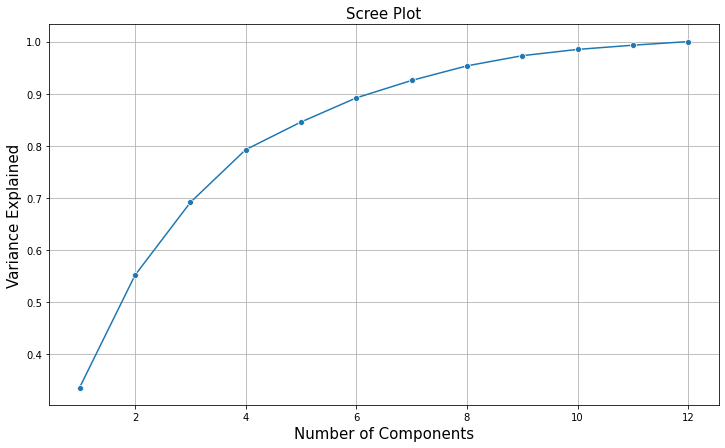

In [31]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_sum_var,x=range(1,len(cum_sum_var)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [32]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
ProdQual,-0.161322,-0.306272,0.079505,0.616477,-0.256709,0.349666
Ecom,-0.138992,0.454921,-0.229884,0.183793,-0.195989,-0.472109
TechSup,-0.127132,-0.235263,-0.621730,-0.166476,-0.043202,0.118961
CompRes,-0.425502,0.008861,0.191751,-0.279906,-0.031001,0.022748
Advertising,-0.177258,0.355907,-0.092238,0.214732,0.763274,0.410458
ProdLine,-0.356524,-0.289853,0.112809,0.098530,0.019621,-0.194306
SalesFImage,-0.210388,0.464927,-0.236626,0.212995,-0.138680,-0.170268
ComPricing,0.137604,0.415467,0.044992,-0.236865,-0.484289,0.600687
WartyClaim,-0.176706,-0.197843,-0.611386,-0.175502,-0.022888,0.137026
OrdBilling,-0.391238,0.020574,0.142820,-0.303399,-0.049670,0.076190


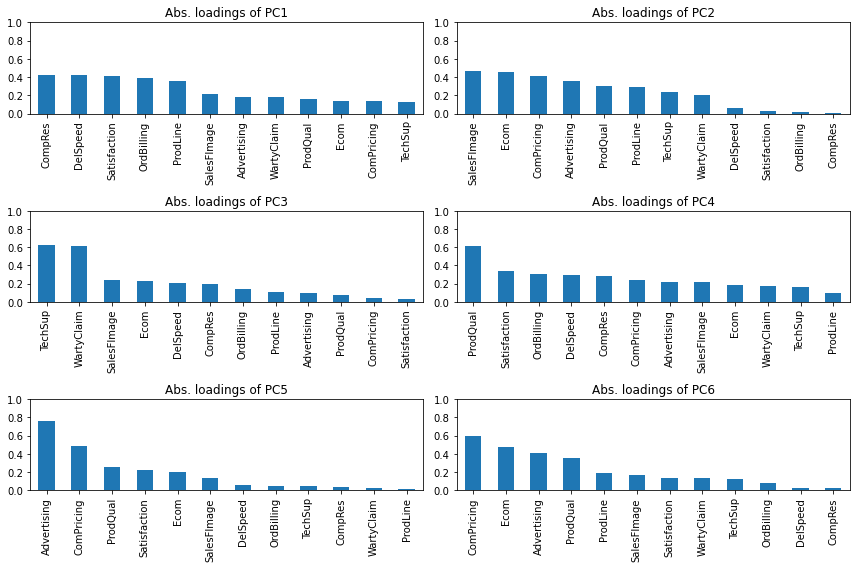

In [33]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

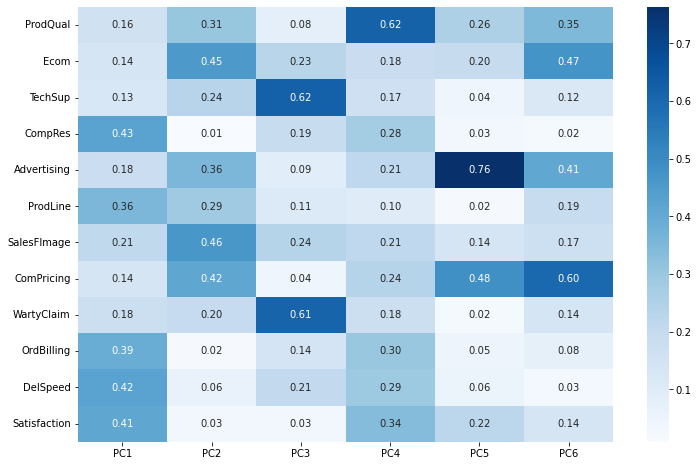

In [34]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [35]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(scaled_df)
pca_final

array([[-4.83997606e-01,  1.62835584e+00,  1.94186034e+00,
         1.36492194e+00,  6.79748863e-02, -2.82986144e-02],
       [-5.49593881e-01, -2.53350262e+00,  1.99787588e+00,
        -1.10741802e+00,  9.35683406e-01, -3.45891083e-01],
       [-2.76018116e+00, -7.08107563e-01,  1.79868065e-01,
         1.29636339e+00,  1.07559501e+00,  7.65942688e-02],
       [ 2.24154496e+00,  1.19532049e-01, -1.88321756e+00,
        -1.31134845e+00,  6.28950621e-01,  1.17871173e+00],
       [ 6.25326379e-01, -1.39548619e+00,  2.75342048e-01,
         3.63613820e-01, -1.28809955e+00, -1.41589726e-01],
       [ 3.44628043e+00,  2.43769246e-01,  1.55309144e+00,
        -8.68194612e-01,  7.16407652e-01,  6.95251318e-01],
       [ 5.23783473e+00,  1.14883451e+00, -5.10145999e-01,
         8.55424490e-01, -1.52341133e+00, -2.84942626e-01],
       [ 1.57212371e+00,  1.10029640e+00,  7.08255535e-01,
        -5.19080559e-01,  9.75912326e-01,  7.31953396e-02],
       [-5.53494243e-01,  1.37210093e+00,  4.918

In [36]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.483998,1.628356,1.941860,1.364922,0.067975,-0.028299
1,-0.549594,-2.533503,1.997876,-1.107418,0.935683,-0.345891
2,-2.760181,-0.708108,0.179868,1.296363,1.075595,0.076594
3,2.241545,0.119532,-1.883218,-1.311348,0.628951,1.178712
4,0.625326,-1.395486,0.275342,0.363614,-1.288100,-0.141590
5,3.446280,0.243769,1.553091,-0.868195,0.716408,0.695251
6,5.237835,1.148835,-0.510146,0.855424,-1.523411,-0.284943
7,1.572124,1.100296,0.708256,-0.519081,0.975912,0.073195
8,-0.553494,1.372101,0.491873,-1.717923,-0.635236,0.171927
9,0.104254,2.016975,0.232000,-0.893381,0.262862,-0.575282


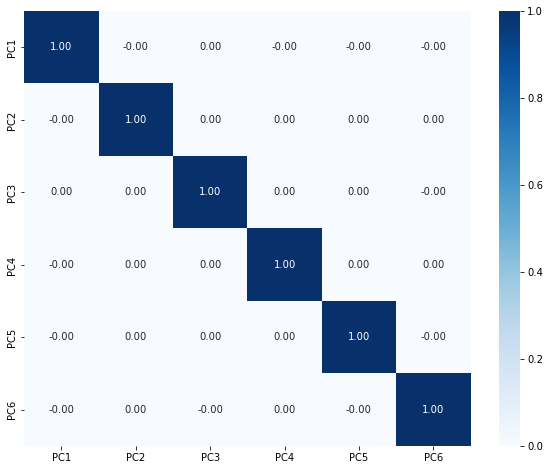

In [37]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(),cmap='Blues', annot=True,fmt='.2f');

# PART 2- CLUSTERING

In [38]:
income=pd.read_csv('State_wise_Health_income.csv')
df_hierarchy=pd.read_csv('State_wise_Health_income.csv')
df_kmeans=pd.read_csv('State_wise_Health_income.csv')

In [39]:
income.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [40]:
income.tail()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
292,292,Greencastle,3443,970,2499,238636
293,293,Greenisland,2963,793,1257,162831
294,294,Greyabbey,3276,609,1522,120184
295,295,Greysteel,3463,847,934,199403
296,296,Groggan,2070,838,3179,166767


In [41]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [42]:
income.duplicated().sum()

0

In [43]:
income=income.set_index('Unnamed: 0')


In [44]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [45]:
mean=income.Health_indeces1.mean()

In [46]:
income.Health_indeces1=income.Health_indeces1.replace(-10,mean)

In [47]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2639.040914,2032.701763,43.0,654.0,2458.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [48]:

income=income.iloc[:,1:]


In [49]:
income.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Unnamed: 0,,,,
0,417.0,66,564,1823
1,1485.0,646,2710,73662
2,654.0,299,1104,27318
3,192.0,25,573,250
4,43.0,8,528,22


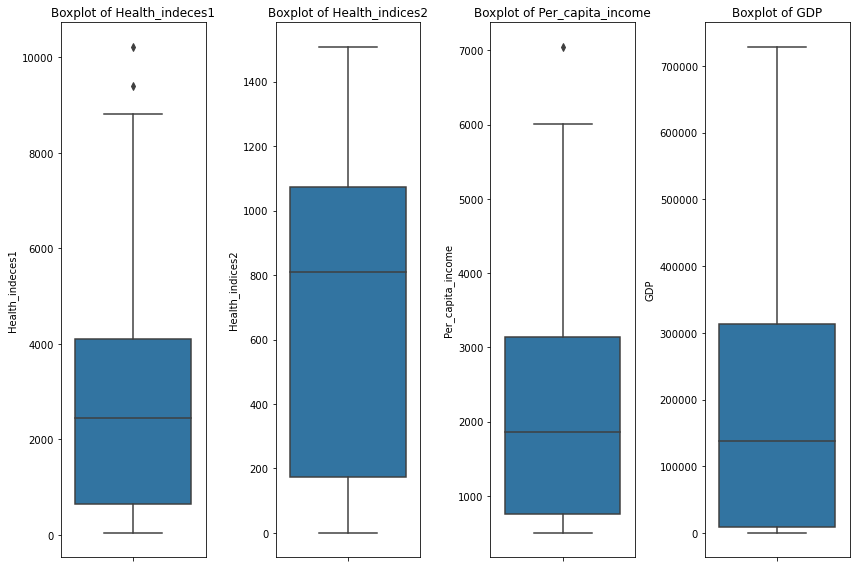

In [50]:
# Checling for Outliers
plt.figure(figsize = (12,8))
feature_list = income.columns
for i in range(len(feature_list)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = income[feature_list[i]], data =income)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [51]:
def remove_outlier(col):
    Q1, Q3= col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [52]:
feature_list=income.columns 
for i in feature_list: 
    LL, UL = remove_outlier(income[i])
    income[i]=np.where(income[i]>UL,UL,income[i])
    income[i]=np.where(income[i]<LL,LL,income[i])

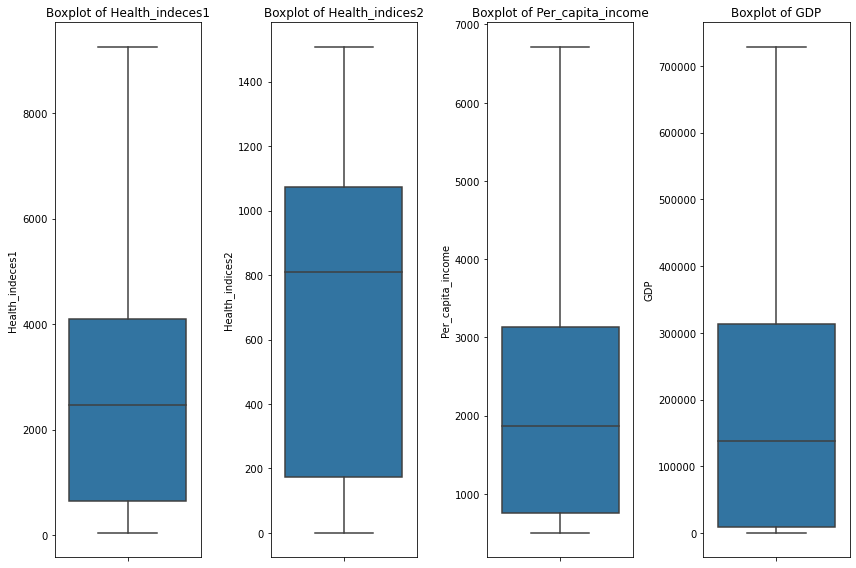

In [53]:
plt.figure(figsize = (12,8))
feature_list = income.columns
for i in range(len(feature_list)):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y = income[feature_list[i]], data =income)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [54]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2635.290072,2019.616382,43.0,654.0,2458.0,4094.0,9254.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2155.794613,1488.285827,500.0,751.0,1865.0,3137.0,6716.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [55]:
income_scaled=income.apply(zscore)

In [56]:
income_scaled.describe()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02
mean,1.173771e-16,1.252272e-17,7.513631e-17,8.032295e-17
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00
min,-1.285722e+00,-1.481634e+00,-1.114429e+00,-1.046096e+00
25%,-9.826787e-01,-1.107825e+00,-9.454942e-01,-9.939707e-01
50%,-8.793219e-02,2.485655e-01,-1.957187e-01,-2.242731e-01
75%,7.234898e-01,8.103462e-01,6.603983e-01,8.298516e-01
max,3.282743e+00,1.739527e+00,3.069237e+00,3.319468e+00


## Hierarchichal Clustering

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
wardlink=linkage(income, method='ward')

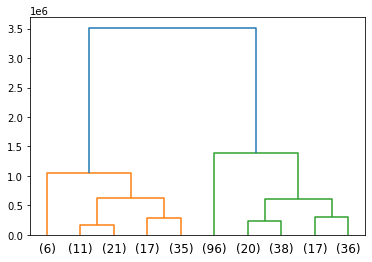

In [59]:
dend=dendrogram(wardlink,
               truncate_mode='lastp',
               p=10)

In [60]:
from scipy.cluster.hierarchy import fcluster

In [61]:

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int3

In [62]:
df_hierarchy=df_hierarchy.set_index('Unnamed: 0')


In [63]:
df_hierarchy['Clusters']=clusters

In [64]:
df_hierarchy['Clusters'].value_counts().sort_index()

1     90
2     96
3    111
Name: Clusters, dtype: int64

In [65]:
df_hierarchy.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Clusters
Unnamed: 0,,,,,,
0,Bachevo,417,66,564,1823,2
1,Balgarchevo,1485,646,2710,73662,3
2,Belasitsa,654,299,1104,27318,2
3,Belo_Pole,192,25,573,250,2
4,Beslen,43,8,528,22,2


In [66]:
hierarchy=df_hierarchy.drop(['States'],axis=1)
hierarchy=hierarchy.groupby('Clusters').mean()
hierarchy['freq']=df_hierarchy.Clusters.value_counts().sort_index()
hierarchy

,Health_indeces1,Health_indices2,Per_capita_income,GDP,freq
Clusters,,,,,
1,4977.011111,1211.088889,3347.733333,393357.988889,90
2,414.500000,105.854167,686.395833,5862.468750,96
3,2643.531532,782.423423,2463.189189,143166.810811,111


## K-Means Clustering

In [67]:
from sklearn.cluster import KMeans 

In [68]:
kmeans=KMeans(n_clusters=2, random_state=1)

In [69]:
kmeans3=KMeans(n_clusters=3, random_state=1)

In [70]:
kmeans.fit(income_scaled)

KMeans(n_clusters=2, random_state=1)

In [71]:
kmeans3.fit(income_scaled)

KMeans(n_clusters=3, random_state=1)

### Within Cluster Sum of Squares

In [72]:
kmeans.inertia_

470.7781863721052

## Calculating WSS for other values of K - Elbow Method

In [73]:
wss_=[]

In [74]:
for i in range (1,11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(income_scaled)
    wss_.append(KM.inertia_)

In [75]:
wss_

[1188.0,
 470.7781863721052,
 259.7912929885415,
 183.08293469065083,
 149.11927136236858,
 117.89105501030753,
 91.24471411210695,
 80.07851087494898,
 71.31785469408145,
 64.06665167985346]

In [76]:
a=[1,2,3,4,5,6,7,8,9,10]

In [77]:
wss1=pd.DataFrame([wss_])
wss1.T

,0
0,1188.000000
1,470.778186
2,259.791293
3,183.082935
4,149.119271
5,117.891055
6,91.244714
7,80.078511
8,71.317855
9,64.066652


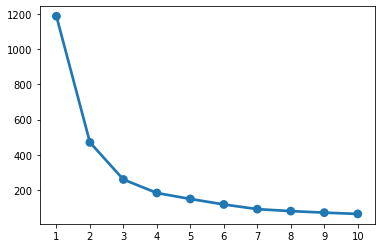

In [78]:
sns.pointplot(a,wss_)
plt.show()

In [79]:
labels2=kmeans.labels_
labels2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
labels3=kmeans3.labels_
labels3

array([2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [82]:
silhouette_score(income_scaled, labels2,random_state=1)

0.5265471728420937

In [83]:
silhouette_score(income_scaled,labels3, random_state=1)

0.5316851862548042

In [84]:
###Silhouette score for 3 clusters is beter than 2 clusters. So, finalizing 3 clusters

In [85]:
df_kmeans['Clusters_KMeans']=labels3

In [86]:
df_kmeans=df_kmeans.set_index('Unnamed: 0')

In [87]:
df_kmeans['Clusters_KMeans'].value_counts().sort_index()

0    101
1     95
2    101
Name: Clusters_KMeans, dtype: int64

In [88]:
df_kmeans.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Clusters_KMeans
Unnamed: 0,,,,,,
0,Bachevo,417,66,564,1823,2
1,Balgarchevo,1485,646,2710,73662,0
2,Belasitsa,654,299,1104,27318,2
3,Belo_Pole,192,25,573,250,2
4,Beslen,43,8,528,22,2


In [89]:
clust_profile=df_kmeans.drop(['States'],axis=1)
clust_profile=clust_profile.groupby('Clusters_KMeans').mean()
clust_profile['freq']=df_kmeans.Clusters_KMeans.value_counts().sort_index()
clust_profile

,Health_indeces1,Health_indices2,Per_capita_income,GDP,freq
Clusters_KMeans,,,,,
0,2597.089109,783.019802,2464.128713,141264.138614,101
1,4930.884211,1212.336842,3385.852632,385648.589474,95
2,499.158416,116.356436,693.772277,9428.099010,101
